In [4]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039285 sha256=84a7f0d1cd81d64e2c8fd5844207ed58e9bc56baf3cd48885ddb1841aa973f0d
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.9
    Uninstalling Cython-3.0.9:
      Successfully uninstalled Cython-3.0.9


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Data import
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = pd.DataFrame(iris.data)
iris_target = iris.target

In [7]:
from google.colab import drive
drive.mount('/content/drive')

cyber = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cybersecurity_data.csv')
wisc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/breast_wisc_dataset.csv')

Mounted at /content/drive


In [8]:
#Normalization Method
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

def normData(data):
  ss_data = StandardScaler().fit_transform(data)
  mm_data = MinMaxScaler().fit_transform(data)
  mAbs_data = MaxAbsScaler().fit_transform(data)
  robust_data = RobustScaler().fit_transform(data)
  return ss_data, mm_data, mAbs_data, robust_data

In [9]:
#Clustering Method
from sklearn.cluster import KMeans, BisectingKMeans, DBSCAN, OPTICS
import hdbscan

def doClustering(data, k, epsilon, x = 5, y = 0.05, z = 0.05):
  kmeans = KMeans(n_clusters=k, random_state=42).fit_predict(data)
  bkmeans = BisectingKMeans(n_clusters=k, random_state=42).fit_predict(data)
  db = DBSCAN(eps=epsilon, min_samples=10).fit_predict(data)
  hdb = hdbscan.HDBSCAN(min_cluster_size=5).fit_predict(data)
  opt = OPTICS(min_samples=x, xi=y, min_cluster_size=z).fit_predict(data)
  labels = [kmeans, bkmeans, db, hdb, opt]
  return labels

In [10]:
#Resolve Mapping
import numpy as np

def resolve_mapping(y_pred,y):
  from scipy.stats import mode
  pred_labels = np.zeros_like(y)

  for i in range(len(np.unique(y))):
    mask = (y_pred==i)
    pred_labels[mask]=mode(y[mask])[0]

  return pred_labels

In [11]:
#Metrics Method
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, normalized_mutual_info_score

norms = ['Standard Scaler', 'MinMax Scaler', 'MaxAbs Scaler', 'Robust Scaler']
model_list = ['KMeans', 'BisectingKMeans', 'DBSCAN', 'HDBSCAN','OPTICS']

def metrics(ss_labels, mm_labels, mAbs_labels, robust_labels, target, data):
  for norm in norms:
    print(f'Metrics for {norm} data:\n')
    if norm == 'Standard Scaler':
      for name, label in zip(model_list,ss_labels):
        if len(data) != 510:
          pred_labels = resolve_mapping(label, target)
        else:
          pred_labels = label
        print(f'Metrics for {norm} {name}:')
        print("V-measure: %0.3f" % v_measure_score(target, pred_labels))
        print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(target, pred_labels))
        print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(target, pred_labels))
        print("Normalized Mutual Information: %0.3f" % normalized_mutual_info_score(target, pred_labels))
        print("Silhouette Coefficient: %0.3f" % silhouette_score(data, pred_labels))
        print('')
    elif norm == 'MinMax Scaler':
      for name, label in zip(model_list,mm_labels):
        if len(data) != 510:
          pred_labels = resolve_mapping(label, target)
        else:
          pred_labels = label
        print(f'Metrics for {norm} {name}:')
        print("V-measure: %0.3f" % v_measure_score(target, pred_labels))
        print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(target, pred_labels))
        print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(target, pred_labels))
        print("Normalized Mutual Information: %0.3f" % normalized_mutual_info_score(target, pred_labels))
        print("Silhouette Coefficient: %0.3f" % silhouette_score(data, pred_labels))
        print('')
    elif norm == 'MaxAbs Scaler':
      for name, label in zip(model_list,mAbs_labels):
        if len(data) != 510:
          pred_labels = resolve_mapping(label, target)
        else:
          pred_labels = label
        print(f'Metrics for {norm} {name}:')
        print("V-measure: %0.3f" % v_measure_score(target, pred_labels))
        print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(target, pred_labels))
        print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(target, pred_labels))
        print("Normalized Mutual Information: %0.3f" % normalized_mutual_info_score(target, pred_labels))
        print("Silhouette Coefficient: %0.3f" % silhouette_score(data, pred_labels))
        print('')
    else:
      for name, label in zip(model_list,robust_labels):
        if len(data) != 510:
          pred_labels = resolve_mapping(label, target)
        else:
          pred_labels = label
        print(f'Metrics for {norm} {name}:')
        print("V-measure: %0.3f" % v_measure_score(target, pred_labels))
        print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(target, pred_labels))
        print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(target, pred_labels))
        print("Normalized Mutual Information: %0.3f" % normalized_mutual_info_score(target, pred_labels))
        print("Silhouette Coefficient: %0.3f" % silhouette_score(data, pred_labels))
        print('')

In [12]:
#iris
from sklearn.preprocessing import LabelEncoder
iris_target = LabelEncoder().fit_transform(iris_target)

ss_iris, mm_iris, mAbs_iris, robust_iris = normData(iris_data)
ss_labels = doClustering(ss_iris,3,0.5)
mm_labels = doClustering(mm_iris,3,0.25)
mAbs_labels = doClustering(mAbs_iris,3,0.25)
robust_labels = doClustering(robust_iris,3,0.5)
print('Iris Data Metrics')
metrics(ss_labels,mm_labels,mAbs_labels,robust_labels,iris_target,iris_data)

Iris Data Metrics
Metrics for Standard Scaler data:

Metrics for Standard Scaler KMeans:
V-measure: 0.659
Adjusted Rand Index: 0.620
Adjusted Mutual Information: 0.655
Normalized Mutual Information: 0.659
Silhouette Coefficient: 0.506

Metrics for Standard Scaler BisectingKMeans:
V-measure: 0.659
Adjusted Rand Index: 0.620
Adjusted Mutual Information: 0.655
Normalized Mutual Information: 0.659
Silhouette Coefficient: 0.506

Metrics for Standard Scaler DBSCAN:
V-measure: 0.223
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.209
Normalized Mutual Information: 0.223
Silhouette Coefficient: -0.162

Metrics for Standard Scaler HDBSCAN:
V-measure: 0.676
Adjusted Rand Index: 0.549
Adjusted Mutual Information: 0.673
Normalized Mutual Information: 0.676
Silhouette Coefficient: 0.657

Metrics for Standard Scaler OPTICS:
V-measure: 0.116
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.107
Normalized Mutual Information: 0.116
Silhouette Coefficient: -0.186

Metrics for MinMax S

In [13]:
#cybersecurity data
cyber = cyber.drop(cyber.columns[(cyber == 0).all()], axis=1)
cyber_target = LabelEncoder().fit_transform(cyber['class'])
cyber_data = cyber.iloc[:,:-1].values

ss_cyber, mm_cyber, mAbs_cyber, robust_cyber = normData(cyber_data)
ss_labels = doClustering(ss_cyber,2,0.5)
mm_labels = doClustering(mm_cyber,2,0.25)
mAbs_labels = doClustering(mAbs_cyber,2,0.25)
robust_labels = doClustering(robust_cyber,2,0.75)
print('Cybersecurity Data Metrics')
metrics(ss_labels,mm_labels,mAbs_labels,robust_labels,cyber_target,cyber_data)

Cybersecurity Data Metrics
Metrics for Standard Scaler data:

Metrics for Standard Scaler KMeans:
V-measure: 0.048
Adjusted Rand Index: 0.109
Adjusted Mutual Information: 0.045
Normalized Mutual Information: 0.048
Silhouette Coefficient: 0.345

Metrics for Standard Scaler BisectingKMeans:
V-measure: 0.048
Adjusted Rand Index: 0.109
Adjusted Mutual Information: 0.045
Normalized Mutual Information: 0.048
Silhouette Coefficient: 0.345

Metrics for Standard Scaler DBSCAN:
V-measure: 0.014
Adjusted Rand Index: -0.051
Adjusted Mutual Information: 0.001
Normalized Mutual Information: 0.014
Silhouette Coefficient: -0.444

Metrics for Standard Scaler HDBSCAN:
V-measure: 0.060
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.046
Normalized Mutual Information: 0.060
Silhouette Coefficient: 0.256

Metrics for Standard Scaler OPTICS:
V-measure: 0.024
Adjusted Rand Index: -0.040
Adjusted Mutual Information: 0.013
Normalized Mutual Information: 0.024
Silhouette Coefficient: -0.041

Metrics 

In [14]:
#wisconsin data
wisc_target = LabelEncoder().fit_transform(wisc['label'])
wisc_data = wisc.iloc[:,1:-1].values

ss_wisc, mm_wisc, mAbs_wisc, robust_wisc = normData(wisc_data)
ss_labels = doClustering(ss_wisc,2,2.5)
mm_labels = doClustering(mm_wisc,2,0.35,6,0.0675,0.0246)
mAbs_labels = doClustering(mAbs_wisc,2,0.35,3,0.03,0.1)
robust_labels = doClustering(robust_wisc,2,2)
print('Wisconsin Breast Tumor Data Metrics')
metrics(ss_labels,mm_labels,mAbs_labels,robust_labels,wisc_target,wisc_data)

Wisconsin Breast Tumor Data Metrics
Metrics for Standard Scaler data:

Metrics for Standard Scaler KMeans:
V-measure: 0.555
Adjusted Rand Index: 0.671
Adjusted Mutual Information: 0.554
Normalized Mutual Information: 0.555
Silhouette Coefficient: 0.500

Metrics for Standard Scaler BisectingKMeans:
V-measure: 0.562
Adjusted Rand Index: 0.677
Adjusted Mutual Information: 0.561
Normalized Mutual Information: 0.562
Silhouette Coefficient: 0.503

Metrics for Standard Scaler DBSCAN:
V-measure: 0.231
Adjusted Rand Index: 0.275
Adjusted Mutual Information: 0.230
Normalized Mutual Information: 0.231
Silhouette Coefficient: 0.227

Metrics for Standard Scaler HDBSCAN:
V-measure: 0.194
Adjusted Rand Index: 0.118
Adjusted Mutual Information: 0.193
Normalized Mutual Information: 0.194
Silhouette Coefficient: 0.019

Metrics for Standard Scaler OPTICS:
V-measure: 0.014
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.012
Normalized Mutual Information: 0.014
Silhouette Coefficient: 0.331

Metr

# Iris

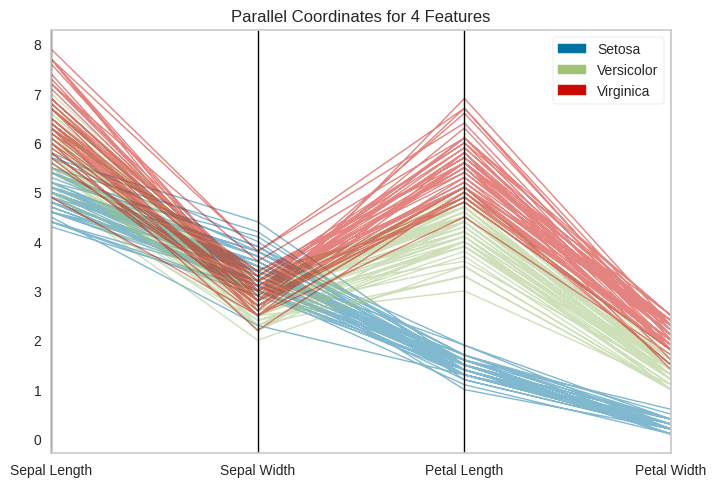

In [15]:
from yellowbrick.features.pcoords import parallel_coordinates

# Specify the features of interest and the classes of the target
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
classes = ["Setosa", "Versicolor", "Virginica"]

visualizer = parallel_coordinates(iris_data, iris_target, classes=classes, features=features, fast=True)

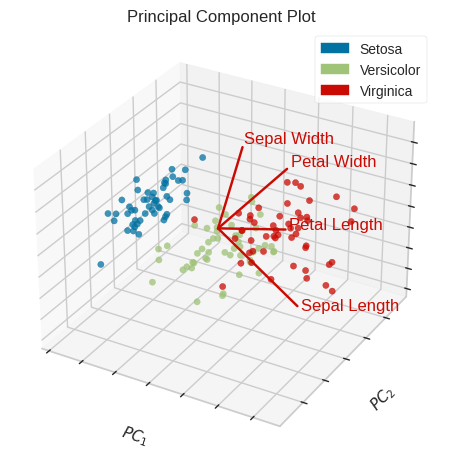

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [16]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, proj_features=True, projection=3, classes=classes, features=features)
visualizer.fit_transform(iris_data, iris_target)
visualizer.show()

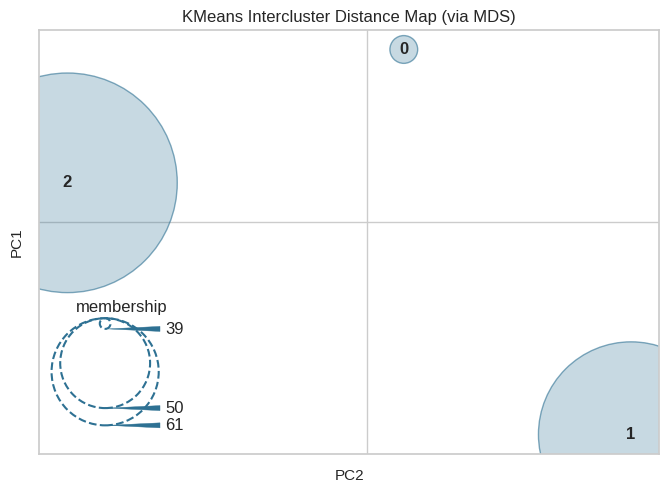

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [17]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(3)
visualizer = InterclusterDistance(model)
visualizer.fit(iris_data)
visualizer.show()

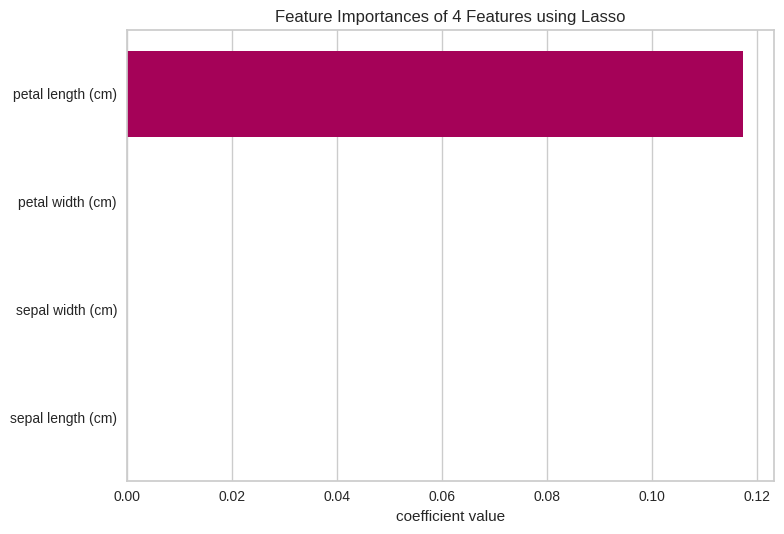

<Axes: title={'center': 'Feature Importances of 4 Features using Lasso'}, xlabel='coefficient value'>

In [18]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

labels = iris.feature_names

# Instantiate the FeatureImportances visualizer with Lasso model
viz = FeatureImportances(Lasso(), labels=labels, relative=False)

viz.fit(iris_data, iris_target)
viz.show()

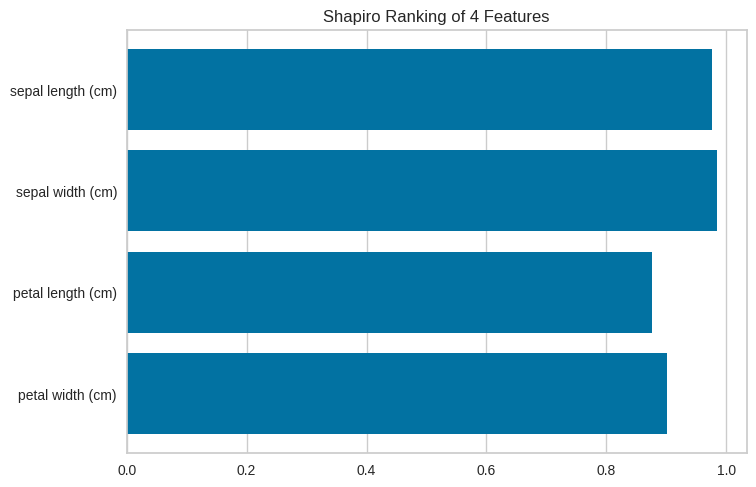

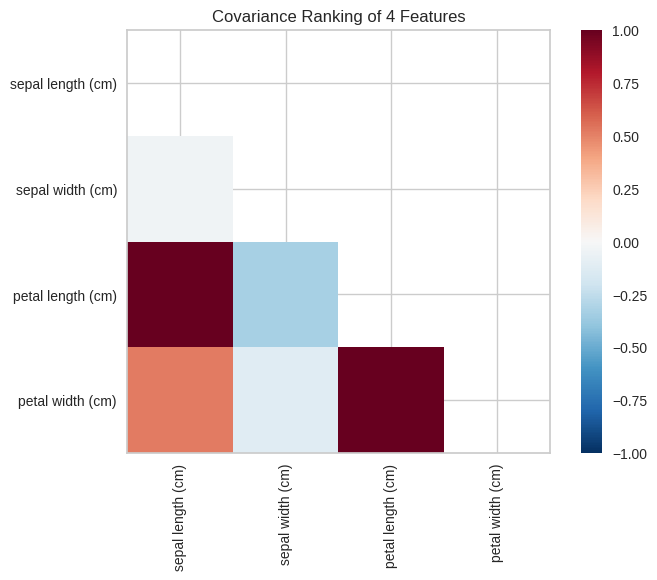

<Axes: title={'center': 'Covariance Ranking of 4 Features'}>

In [19]:
import matplotlib.pyplot as plt
from yellowbrick.features import Rank1D, Rank2D

visualizer = Rank1D(show=False, features=iris.feature_names)
visualizer.fit(iris_data, iris_target)
visualizer.transform(iris_data)
visualizer.show()

# Visualize bivariate relationships using Rank2D
visualizer = Rank2D(algorithm='covariance', features=iris.feature_names)

visualizer.fit(iris_data, iris_target)
visualizer.transform(iris_data)
visualizer.show()

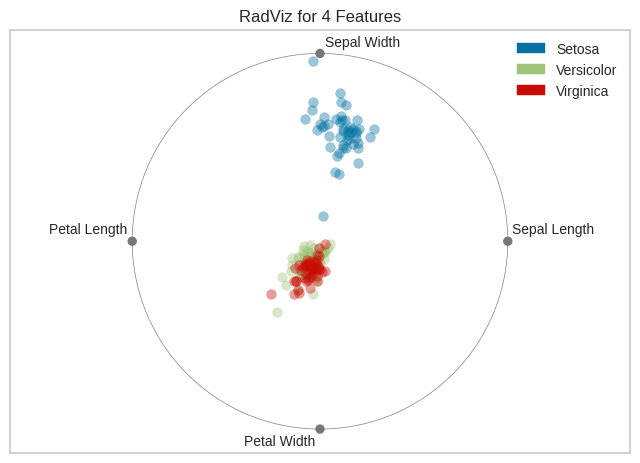

<Axes: title={'center': 'RadViz for 4 Features'}>

In [20]:
from yellowbrick.features import RadViz

visualizer = RadViz(classes=classes, features = features, alpha = .4)
visualizer.fit(iris_data, iris_target)
visualizer.transform(iris_data)
visualizer.show()

# Cyber


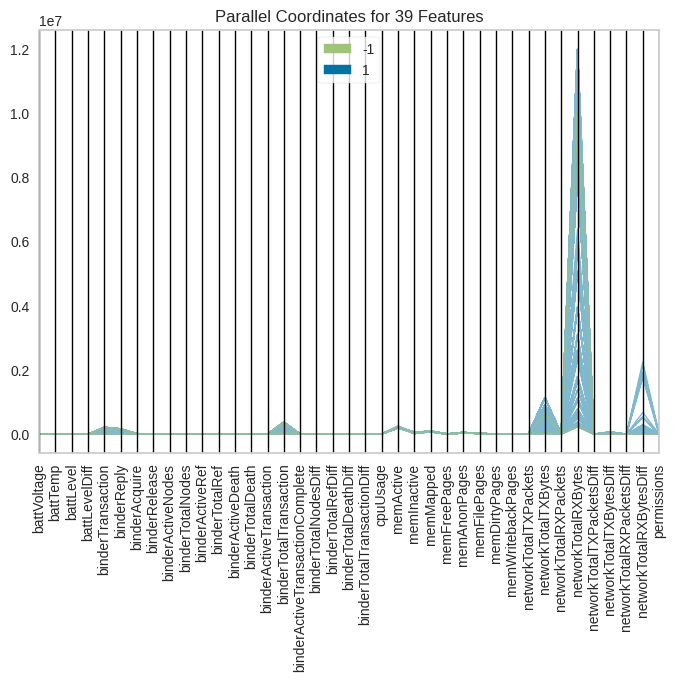

In [21]:
from yellowbrick.features.pcoords import parallel_coordinates
features = cyber.columns[:-1].tolist()
classes = ["1", "-1"]
visualizer = parallel_coordinates(cyber_data, cyber_target, classes=classes, features=features, fast=True, show=False)
visualizer.ax.tick_params(axis='x', labelrotation=90)

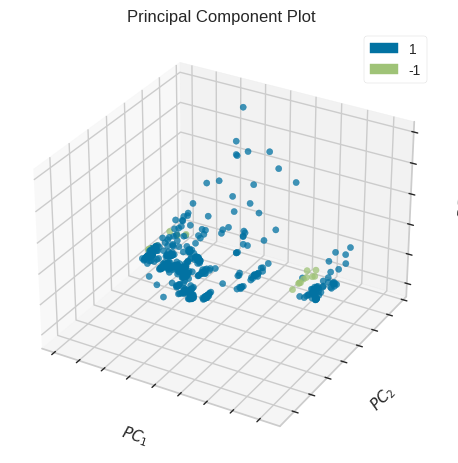

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [22]:
from yellowbrick.features import PCA
classes = ["1", "-1"]
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(cyber_data, cyber_target)
visualizer.show()

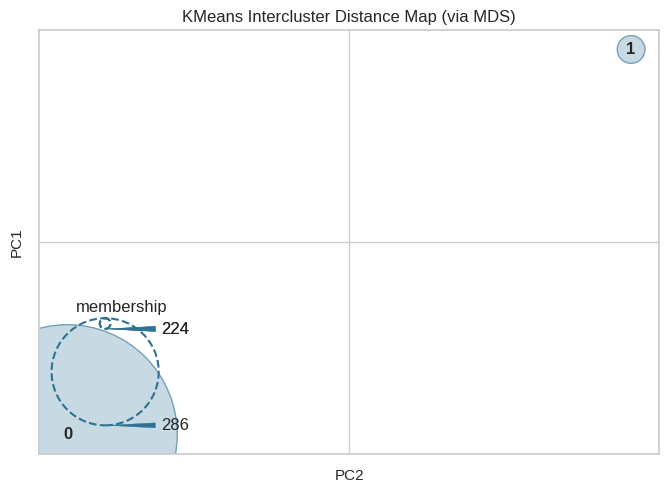

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [23]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(2)
visualizer = InterclusterDistance(model)
visualizer.fit(cyber_data)
visualizer.show()

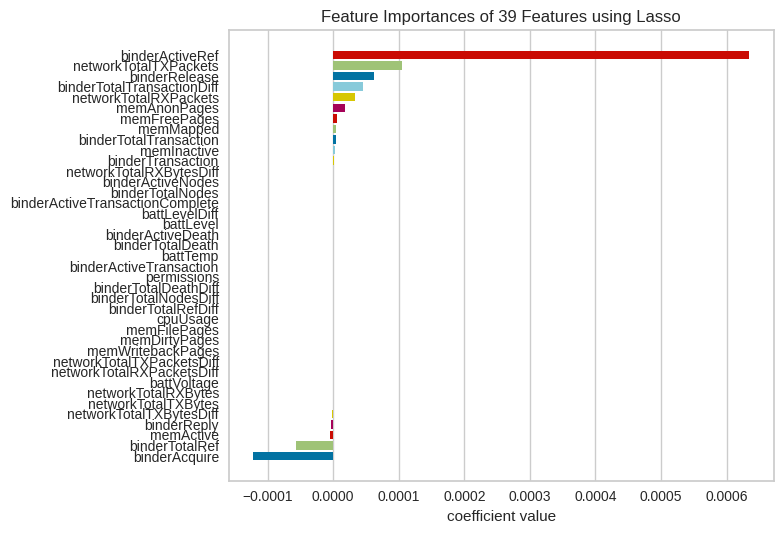

<Axes: title={'center': 'Feature Importances of 39 Features using Lasso'}, xlabel='coefficient value'>

In [24]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

labels = cyber.columns[:-1]

# Instantiate the FeatureImportances visualizer with Lasso model
viz = FeatureImportances(Lasso(), labels=labels, relative=False)

viz.fit(cyber_data, cyber_target)
viz.show()

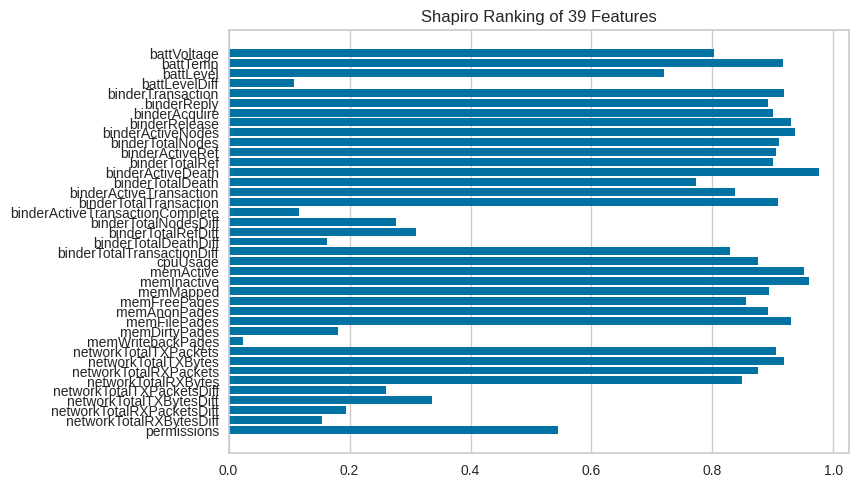

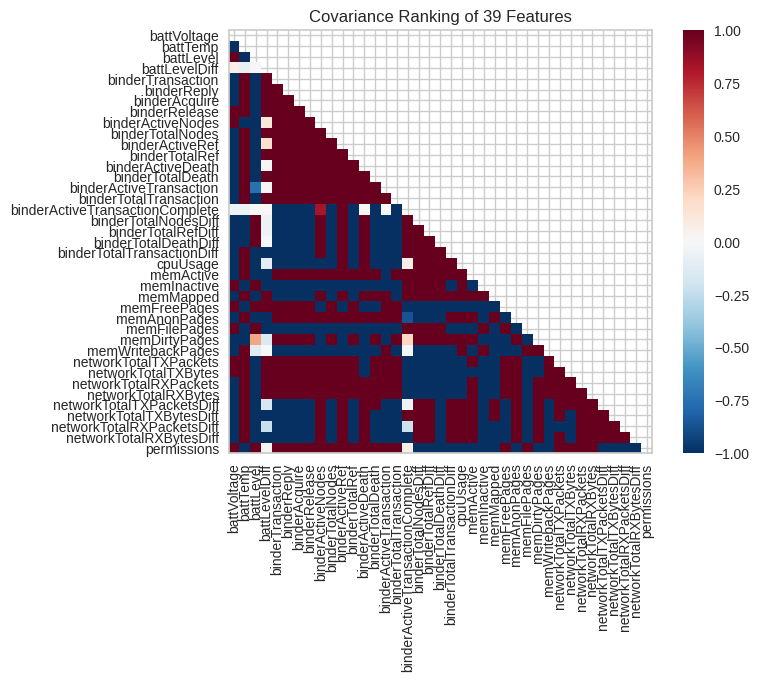

<Axes: title={'center': 'Covariance Ranking of 39 Features'}>

In [25]:
import matplotlib.pyplot as plt
from yellowbrick.features import Rank1D, Rank2D

visualizer = Rank1D(show=False, features=features)
visualizer.fit(cyber_data, cyber_target)
visualizer.transform(cyber_data)
visualizer.show()

# Visualize bivariate relationships using Rank2D
visualizer = Rank2D(algorithm='covariance', features=features)

visualizer.fit(cyber_data, cyber_target)
visualizer.transform(cyber_data)
visualizer.show()

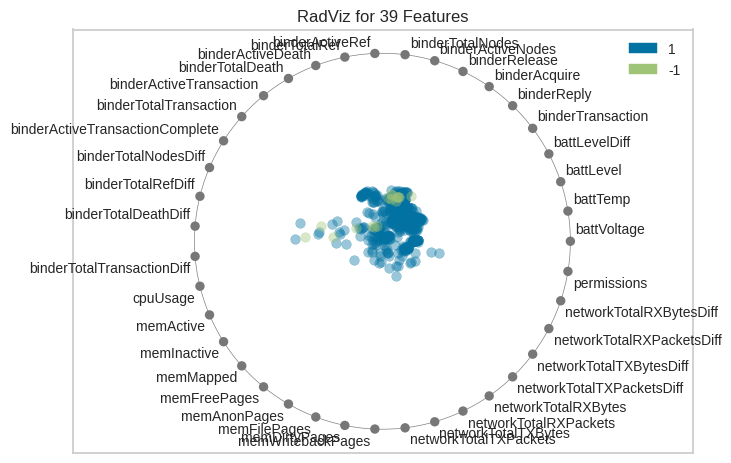

<Axes: title={'center': 'RadViz for 39 Features'}>

In [26]:
from yellowbrick.features import RadViz

visualizer = RadViz(classes=classes, alpha=.4, features=features)
visualizer.fit(cyber_data, cyber_target)
visualizer.transform(cyber_data)
visualizer.show()

# Wisc

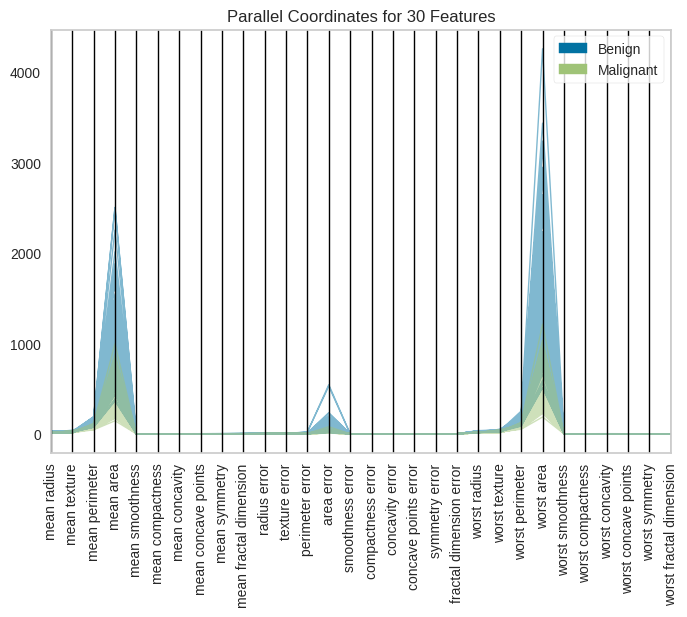

In [27]:
from yellowbrick.features.pcoords import parallel_coordinates
features = wisc.columns[1:-1]
classes = ['Benign','Malignant']
visualizer = parallel_coordinates(wisc_data, wisc_target, classes=classes, features=features, fast=True, show=False)
visualizer.ax.tick_params(axis='x', labelrotation=90)

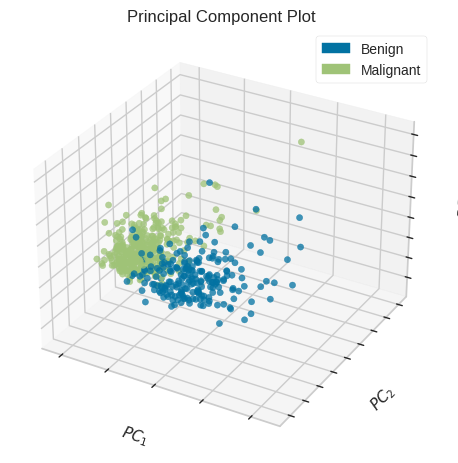

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [28]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True,projection=3, classes=classes)
visualizer.fit_transform(wisc_data, wisc_target)
visualizer.show()

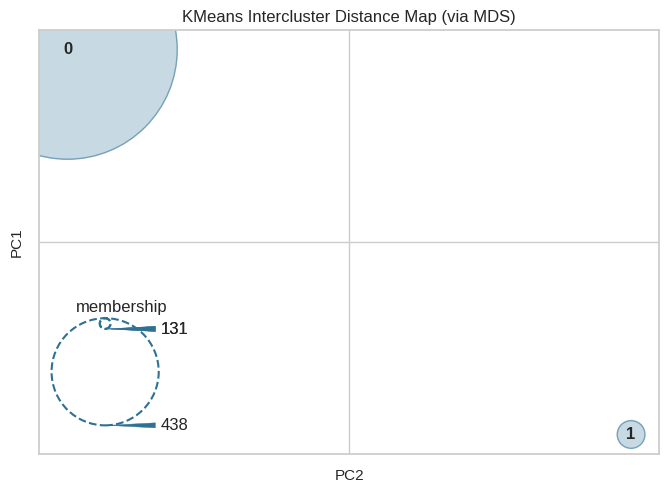

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [29]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(2)
visualizer = InterclusterDistance(model)
visualizer.fit(wisc_data)
visualizer.show()

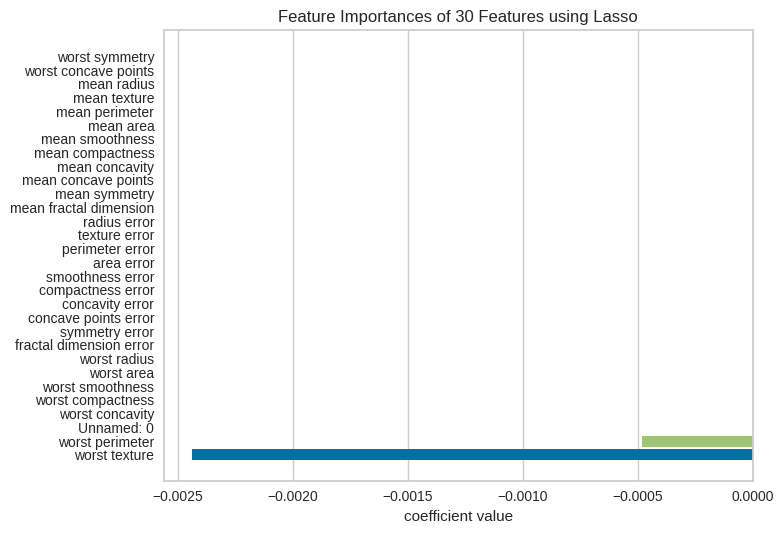

<Axes: title={'center': 'Feature Importances of 30 Features using Lasso'}, xlabel='coefficient value'>

In [30]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

labels = wisc.columns[:-1]

# Instantiate the FeatureImportances visualizer with Lasso model
viz = FeatureImportances(Lasso(), labels=labels, relative=False)

viz.fit(wisc_data, wisc_target)
viz.show()

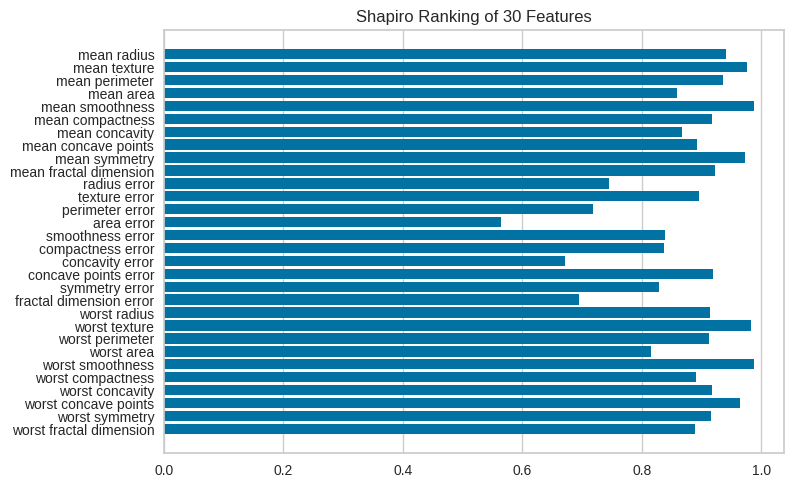

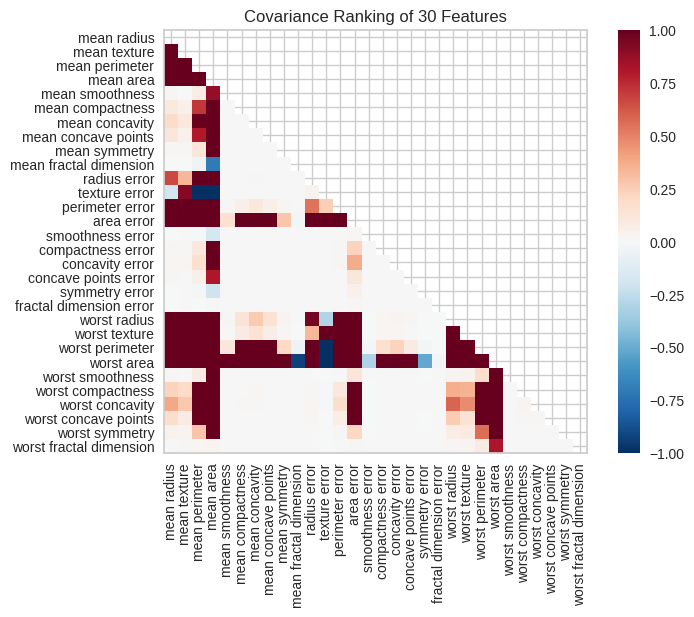

<Axes: title={'center': 'Covariance Ranking of 30 Features'}>

In [31]:
import matplotlib.pyplot as plt
from yellowbrick.features import Rank1D, Rank2D

visualizer = Rank1D(show=False, features=features)
visualizer.fit(wisc_data, wisc_target)
visualizer.transform(wisc_data)
visualizer.show()

# Visualize bivariate relationships using Rank2D
visualizer = Rank2D(algorithm='covariance', features=features)

visualizer.fit(wisc_data, wisc_target)
visualizer.transform(wisc_data)
visualizer.show()

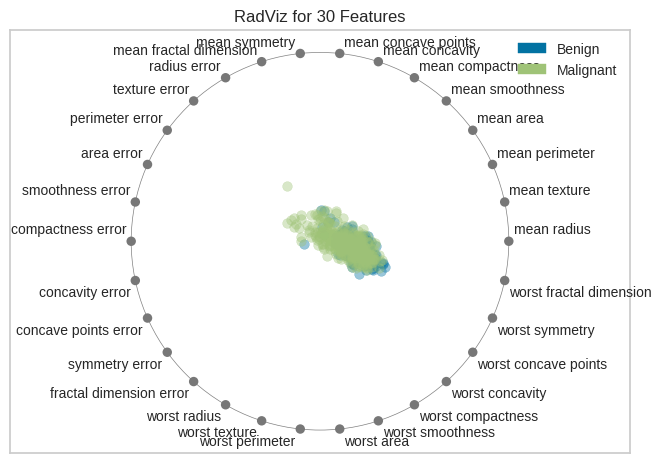

<Axes: title={'center': 'RadViz for 30 Features'}>

In [32]:
from yellowbrick.features import RadViz

visualizer = RadViz(classes=classes, alpha = .4, features = features)
visualizer.fit(wisc_data, wisc_target)
visualizer.transform(wisc_data)
visualizer.show()

In [33]:
hft = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HFT_AAPL_data.csv')
hft.head()

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,0,2/1/2019 9:30,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.93,789821
1,1,2/1/2019 9:31,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.21,170656
2,2,2/1/2019 9:32,167.051,-0.000042,166.910,167.20,166.88,2.232776e+07,1016,167.17,133658
3,3,2/1/2019 9:33,166.945,-0.000676,166.958,167.11,166.77,2.014459e+07,839,166.97,120666
4,4,2/1/2019 9:34,167.045,-0.000078,167.180,167.19,166.92,1.707804e+07,843,166.96,102236


In [34]:
hft['Date'] = pd.to_datetime(hft['Date'])
hft['Date'] = hft['Date'].apply(lambda x: x.toordinal())


for index, row in hft.iterrows():
    if row['marketChangeOverTime'] > 0:
        hft.at[index, 'marketChangeOverTime'] = 'increase'
    elif row['marketChangeOverTime'] < 0:
        hft.at[index, 'marketChangeOverTime'] = 'decrease'
    else:
        hft.at[index, 'marketChangeOverTime'] = 'no change'


hft_target = LabelEncoder().fit_transform(hft['marketChangeOverTime'])
hft_data = hft.iloc[:, [i for i in range(hft.shape[1]) if i not in [0, 3]]].values

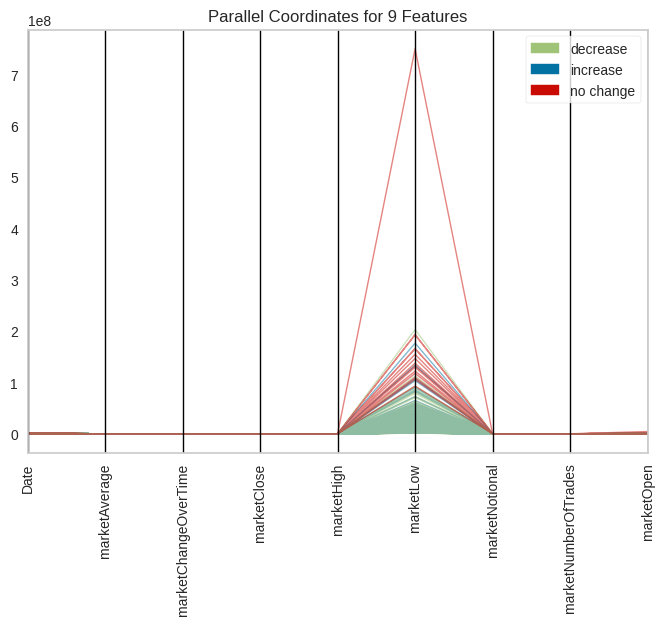

In [35]:
from yellowbrick.features.pcoords import parallel_coordinates
features = hft.columns[1:-1]
classes = ['increase','decrease', 'no change']
visualizer = parallel_coordinates(hft_data, hft_target, classes=classes, features=features, fast=True, show=False)
visualizer.ax.tick_params(axis='x', labelrotation=90)

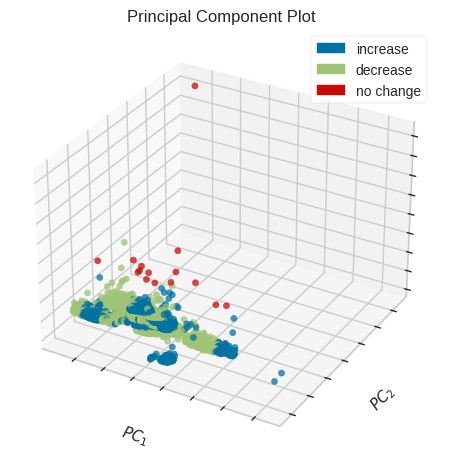

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [36]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True,projection=3, classes=classes)
visualizer.fit_transform(hft_data, hft_target)
visualizer.show()

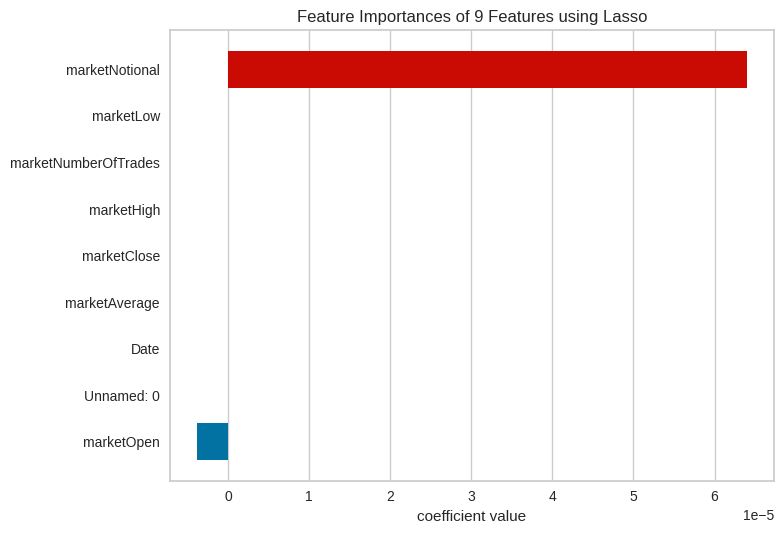

<Axes: title={'center': 'Feature Importances of 9 Features using Lasso'}, xlabel='coefficient value'>

In [37]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

labels = hft.columns
labels = [col for i, col in enumerate(labels) if i != 3]

# Instantiate the FeatureImportances visualizer with Lasso model
viz = FeatureImportances(Lasso(), labels=labels, relative=False)

viz.fit(hft_data, hft_target)
viz.show()

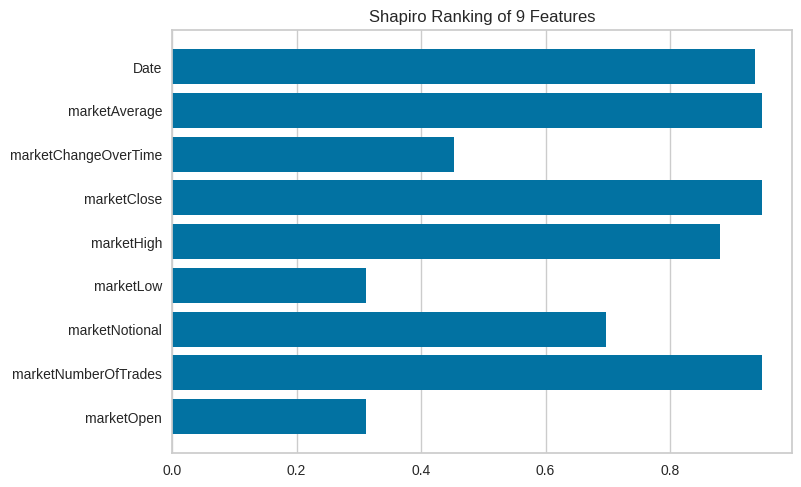

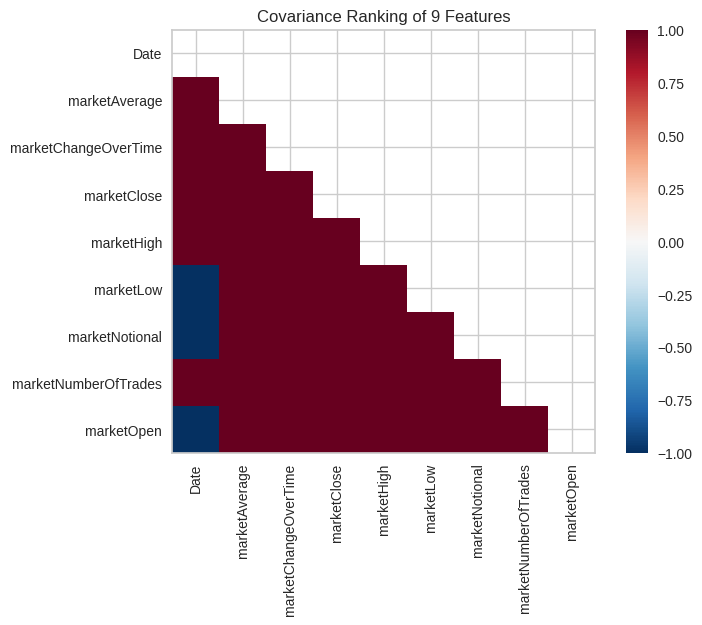

<Axes: title={'center': 'Covariance Ranking of 9 Features'}>

In [38]:
import matplotlib.pyplot as plt
from yellowbrick.features import Rank1D, Rank2D

visualizer = Rank1D(show=False, features=features)
visualizer.fit(hft_data, hft_target)
visualizer.transform(hft_data)
visualizer.show()

# Visualize bivariate relationships using Rank2D
visualizer = Rank2D(algorithm='covariance', features=features)

visualizer.fit(hft_data, hft_target)
visualizer.transform(hft_data)
visualizer.show()

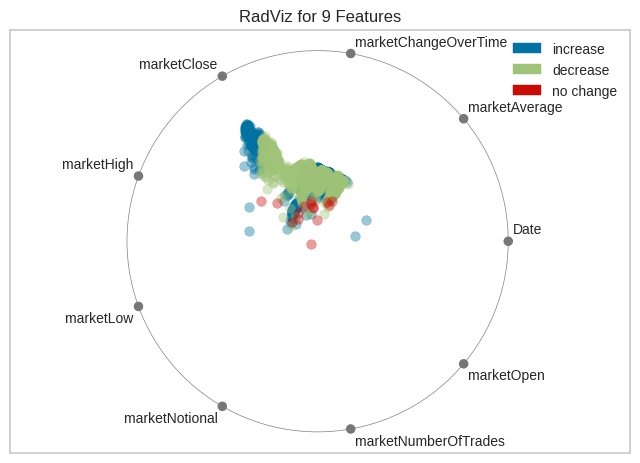

<Axes: title={'center': 'RadViz for 9 Features'}>

In [39]:
from yellowbrick.features import RadViz
visualizer = RadViz(classes=classes, features = features, alpha = .4)
visualizer.fit(hft_data, hft_target)
visualizer.transform(hft_data)
visualizer.show()

# Heart

In [40]:
heart = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
heart_target = heart['output']
heart_data = heart.drop(columns="output")

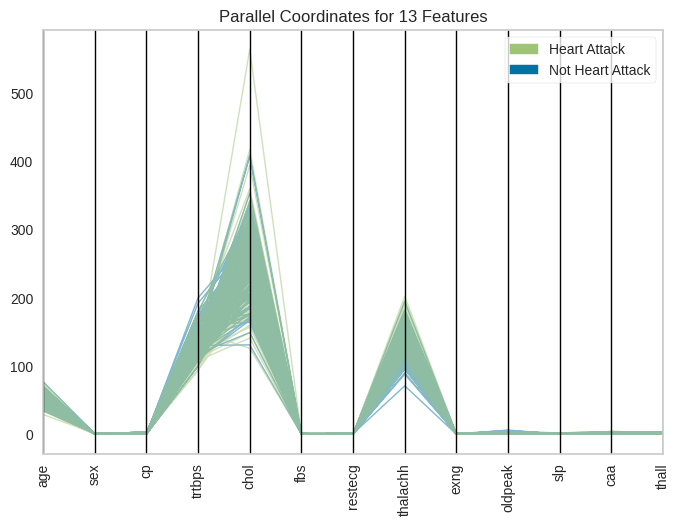

In [41]:
from yellowbrick.features.pcoords import parallel_coordinates
features = heart_data.columns
classes = ['Not Heart Attack','Heart Attack']
visualizer = parallel_coordinates(heart_data, heart_target, classes=classes, features=features, fast=True, show=False)
visualizer.ax.tick_params(axis='x', labelrotation=90)

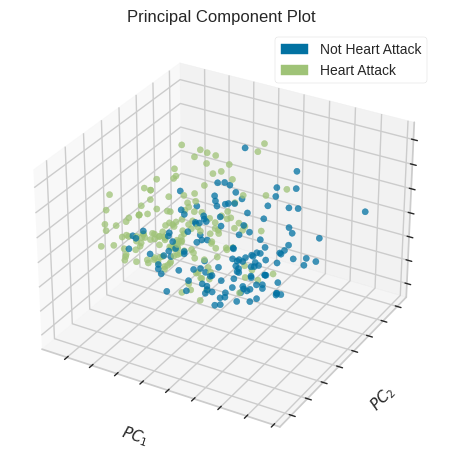

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [42]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True,projection=3, classes=classes)
visualizer.fit_transform(heart_data, heart_target)
visualizer.show()

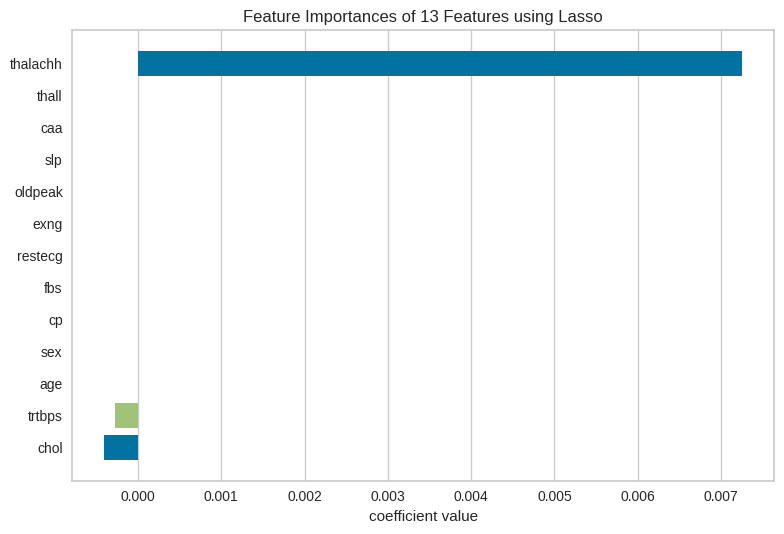

<Axes: title={'center': 'Feature Importances of 13 Features using Lasso'}, xlabel='coefficient value'>

In [43]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

# Instantiate the FeatureImportances visualizer with Lasso model
viz = FeatureImportances(Lasso(), labels=features, relative=False)

viz.fit(heart_data, heart_target)
viz.show()

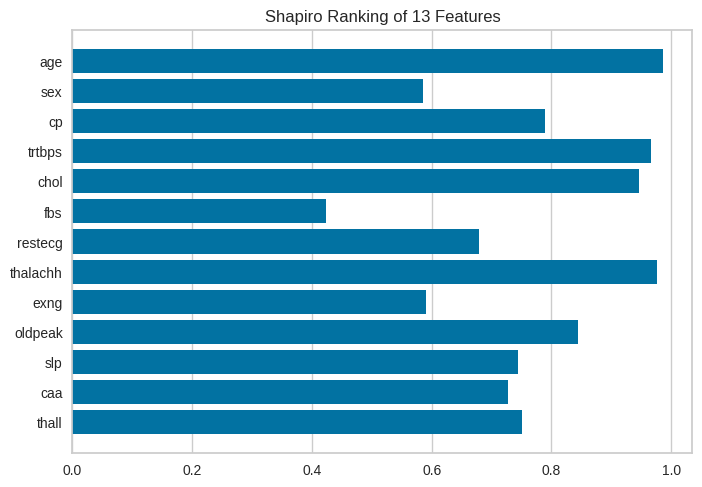

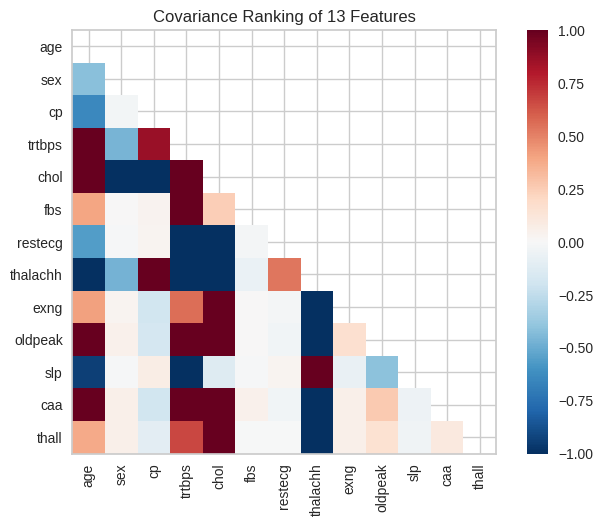

<Axes: title={'center': 'Covariance Ranking of 13 Features'}>

In [44]:
import matplotlib.pyplot as plt
from yellowbrick.features import Rank1D, Rank2D

visualizer = Rank1D(show=False, features=features)
visualizer.fit(heart_data, heart_target)
visualizer.transform(heart_data)
visualizer.show()

# Visualize bivariate relationships using Rank2D
visualizer = Rank2D(algorithm='covariance', features=features)

visualizer.fit(heart_data, heart_target)
visualizer.transform(heart_data)
visualizer.show()

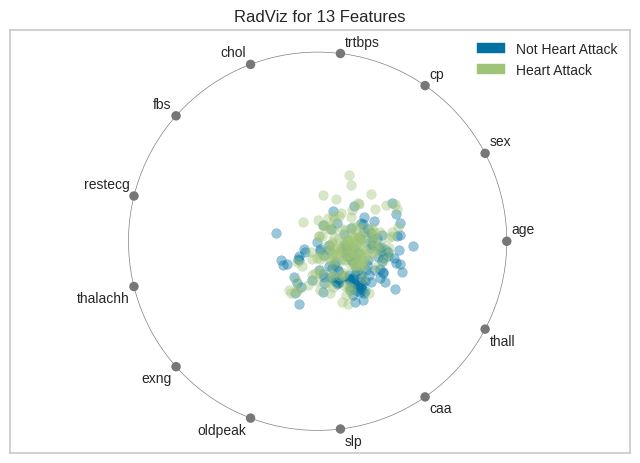

<Axes: title={'center': 'RadViz for 13 Features'}>

In [45]:
from yellowbrick.features import RadViz
visualizer = RadViz(classes=classes, alpha = .4, features=features)
visualizer.fit(heart_data, heart_target)
visualizer.transform(heart_data)
visualizer.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport

classifier = RandomForestClassifier(random_state=42)

# Train classifier
classifier.fit(mAbs_iris, iris_target)

# Predictions
predictions = classifier.predict(mAbs_iris)

# Print classification report
print("Classification Report for RandomForestClassifier with MaxAbs scaled KMeans labels:")
print(classification_report(iris_target, predictions))

Classification Report for RandomForestClassifier with MaxAbs scaled KMeans labels:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

